# DNN으로 삼각함수 예측하기




* pyforest 참고 - https://hyeonchan523.github.io/python/pyforest/

In [26]:
!pip install pyforest


In [27]:
import pyforest
# pyforest를 사용해서 42개의 라이브러리 임포트!
# blog 참고..

In [28]:
all_libs = dir(pyforest) # import 된 모든 라이브러리를 반환
# all_libs

In [29]:
# active_libs = pyforest.active_imports() # import 되었지만 사용되지 않은 라이브러리 리스트 반환
laze_libs = pyforest.lazy_imports() # import되고, 사용중인 라이브러리의 리스트 반환
active_libs
laze_libs
# 시각화 https://ichi.pro/ko/dangsin-i-moleuneun-5-gaeui-paisseon-laibeuleoli-278655347946407

['from sklearn.preprocessing import OneHotEncoder',
 'import datetime as dt',
 'import fbprophet',
 'from sklearn.impute import SimpleImputer',
 'from sklearn.decomposition import PCA',
 'from xlrd import open_workbook',
 'import plotly.express as px',
 'from sklearn.model_selection import GridSearchCV',
 'from PIL import Image',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'import keras',
 'import torch',
 'from sklearn.manifold import TSNE',
 'import awswrangler as wr',
 'from sklearn.preprocessing import PolynomialFeatures',
 'import plotly.graph_objs as go',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'from sklearn.ensemble import RandomForestRegressor',
 'from sklearn.linear_model import LinearRegression',
 'from sklearn.preprocessing import MinMaxScaler',
 'import textblob',
 'from sklearn.linear_model import Lasso',
 'from sklearn.cluster import KMeans',
 'import nltk',
 'import tqdm',
 'import pydot',
 'from sklearn.linear_model import RidgeCV',


In [30]:
print('==================')
print('Active libs \n',len(active_libs))
print('==================')
print('Laze libs \n',len(laze_libs))
print('==================')

Active libs 
 5
Laze libs 
 55


# 데이터 생성

## cos 함수로 데이터 생성

* numpy.cos - https://numpy.org/doc/stable/reference/generated/numpy.cos.html

In [31]:
def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data)-look_back):
      # 0~ signal data- lookback까지
        dataX.append(signal_data[i:(i+look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [14]:
# 데이터셋 생성하기
cos_x = np.linspace(-20*np.pi, 20*np.pi, 1000) # -20pi ~ 20pi 범위의 X값 생성
cos_y = np.cos(cos_x) # np.sin 함수로 Y값 생성

signal_data = cos_y.reshape(-1, 1) #-1은 남은 값을 이야기해줌
signal_data[:5]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([[1.        ],
       [0.99209893],
       [0.96852057],
       [0.9296375 ],
       [0.87606417]])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

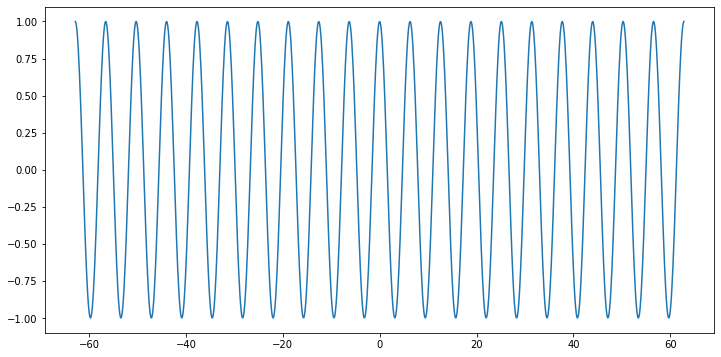

In [15]:
plt.figure(figsize=(12,6))
plt.plot(cos_x, cos_y)
plt.show()

In [16]:
# 데이터 분리
train = signal_data[0:800]
val = signal_data[800:1200]
test = signal_data[1200:]

In [24]:
# 데이터셋 생성
look_back = 10 # 지난 10개의 값으로 11번째 값 예측

x_train, y_train = create_dataset(train, look_back)
x_val, y_val = create_dataset(val, look_back)
x_test, y_test = create_dataset(test, look_back)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
print(x_train[0].shape)
x_train[0], y_train[0]

(10,)


(array([1.        , 0.99209893, 0.96852057, 0.9296375 , 0.87606417,
        0.80864715, 0.72845177, 0.63674529, 0.53497686, 0.42475466]),
 0.30782042101662876)

# Model - DNN

In [36]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
drop_rate =0.3

model = Sequential()
model.add(Dense(32, activation="relu", input_dim=10))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adagrad')

hist = model.fit(x_train, y_train, epochs=50, batch_size=8, validation_data=(x_val, y_val), verbose=2)

Epoch 1/50
99/99 - 1s - loss: 0.3797 - val_loss: 0.2990
Epoch 2/50
99/99 - 0s - loss: 0.2600 - val_loss: 0.2265
Epoch 3/50
99/99 - 0s - loss: 0.1984 - val_loss: 0.1741
Epoch 4/50
99/99 - 0s - loss: 0.1529 - val_loss: 0.1385
Epoch 5/50
99/99 - 0s - loss: 0.1222 - val_loss: 0.1131
Epoch 6/50
99/99 - 0s - loss: 0.1005 - val_loss: 0.0940
Epoch 7/50
99/99 - 0s - loss: 0.0839 - val_loss: 0.0787
Epoch 8/50
99/99 - 0s - loss: 0.0705 - val_loss: 0.0664
Epoch 9/50
99/99 - 0s - loss: 0.0596 - val_loss: 0.0562
Epoch 10/50
99/99 - 0s - loss: 0.0505 - val_loss: 0.0478
Epoch 11/50
99/99 - 0s - loss: 0.0429 - val_loss: 0.0409
Epoch 12/50
99/99 - 0s - loss: 0.0367 - val_loss: 0.0350
Epoch 13/50
99/99 - 0s - loss: 0.0315 - val_loss: 0.0299
Epoch 14/50
99/99 - 0s - loss: 0.0270 - val_loss: 0.0255
Epoch 15/50
99/99 - 0s - loss: 0.0230 - val_loss: 0.0216
Epoch 16/50
99/99 - 0s - loss: 0.0194 - val_loss: 0.0182
Epoch 17/50
99/99 - 0s - loss: 0.0162 - val_loss: 0.0151
Epoch 18/50
99/99 - 0s - loss: 0.0135 - 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

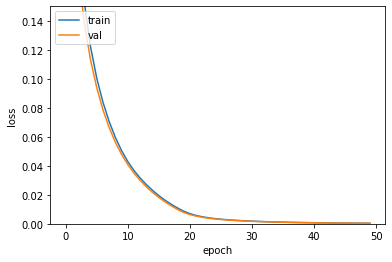

In [37]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [38]:
trainScore = model.evaluate(x_train, y_train, verbose=0)
print('Train Score: ', round(trainScore, 6))
valScore = model.evaluate(x_val, y_val, verbose=0)
print('Validataion Score: ', round(valScore, 6))
testScore = model.evaluate(x_test, y_test, verbose=0)
print('Test Score: ', round(testScore, 6))

Train Score:  0.000364
Validataion Score:  0.000338


TypeError: ignored

In [40]:
print(testScore)

[]


In [ ]:
x_test.shape

(390, 10)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

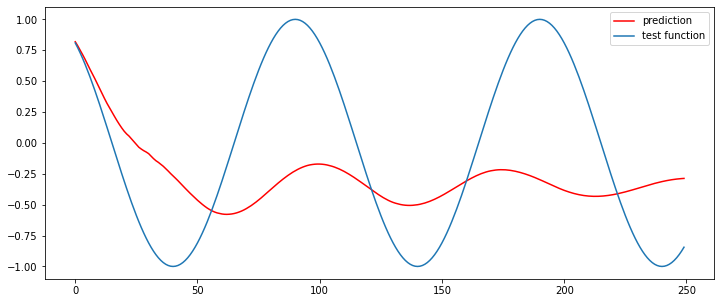

In [ ]:
look_ahead = 250
xhat = x_test[0, None]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(xhat, batch_size=32)
    predictions[i] = prediction
    xhat = np.hstack([xhat[:,1:], prediction])

plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead), predictions,'r', label="prediction")
plt.plot(np.arange(look_ahead), y_test[:look_ahead], label="test function")
plt.legend()
plt.show()